# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial^{2} u}{\partial x^2} = \frac{\partial^2 u}{\partial y^2}$$
sujeta a las condiciones de frontera:
$$u(0,y)= 10y \; \; \frac{\partial u}{\partial x}|_{x=1}=-1, \;\;\; 0<a<1$$
Y la condición inicial:
$$u(x,0)=0,\;\;\; u(x,1)=0 \;\;\;0<b<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{\infty}(\frac{20(-1)^{n+1})}{n \pi}\cosh (n \pi x)+\frac{20(-1)^{n}n \pi\sinh (n \pi)-2(1-(-1)^{n})}{n^{2}\pi^{2}\cosh (n \pi)}\sinh (n \pi x))\sin (n \pi y).$$

In [4237]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [4238]:
def rectaf(y):
    x = zeros(len(y))
    for i in range(len(y)):
        x[i]=10*y[i]
    return x

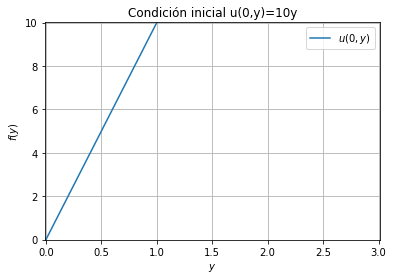

In [4239]:
y = linspace(0,1,1000)
f = rectaf(y)
plot(y,f,label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Condición inicial u(0,y)=10y")
xlim([-0.01,3.01]),ylim([-0.01,10.01]),grid(),legend()

show()

Usamos una serie de Fourier para aproximar la condición inicial $u(0,y)=10y$.

In [4240]:
def u_0(y,N=15): # N es el número de armónicos
    f = zeros(len(y))
    for n in range(1,N):
        f += sin(n*pi*y)*((-20*(-1)**(n))/(n*pi))*cosh(n*pi*0) + sin(n*pi*y)*sinh(n*pi*0)*((20*((-1)**(n))*n*pi*sinh(n*pi)-(2*(1-(-1)**(n))))/(n**(2)*pi**(2)*cosh(n*pi)))
    return f

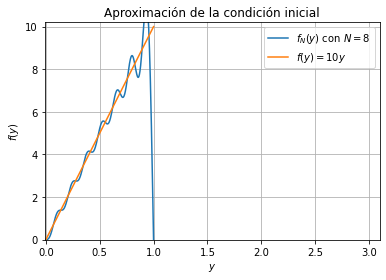

In [4241]:
f_n = u_0(y)
plot(y,f_n,label='$f_N(y)$ con $N=8$')
plot(y,f,label='$f(y)=10y$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,3.1]),ylim([-0.01,10.2]),grid(),legend()
show()

Ahora, graficamos la condición $\frac{\partial u}{\partial x}|_{x=1}=-1$

In [4242]:
def rectag(y):
    x = zeros(len(y))
    for i in range(len(y)):
        x[i]=-1
    return x

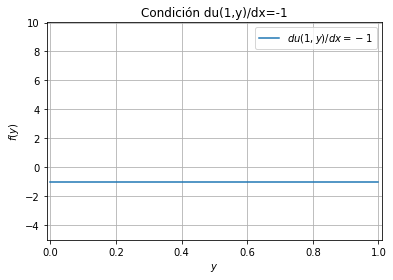

In [4243]:
y = linspace(0,1,1000)
g = rectag(y)
plot(y,g,label='$du(1,y)/dx=-1$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Condición du(1,y)/dx=-1")
xlim([-0.01,1.01]),ylim([-5.01,10.01]),grid(),legend()

show()

Usamos una serie de Fourier para aproximar la condición $\frac{\partial u}{\partial x}|_{x=1}=-1$.

In [4244]:
def u_1(y,N=9): # N es el número de armónicos
    g = zeros(len(y))
    for n in range(1,N):
        g += sin(n*pi*y)*((-20*(-1)**(n)))*sinh(n*pi) + sin(n*pi*y)*n*pi *cosh(n*pi)*((20*((-1)**(n))*n*pi*sinh(n*pi)-(2*(1-(-1)**(n))))/(n**(2)*pi**(2)*cosh(n*pi)))
    return g

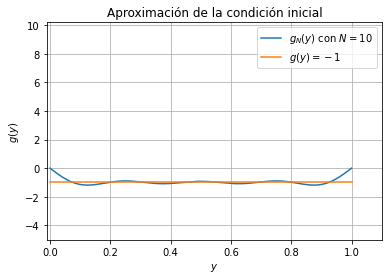

In [4245]:
g_n = u_1(y)
plot(y,g_n,label='$g_N(y)$ con $N=10$')
plot(y,g,label='$g(y)=-1$')
plt.xlabel('$y$'); plt.ylabel('$g(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-5.01,10.2]),grid(),legend()
show()

Por el teorema de superposicion sabemos que $u(x,y)=u_{1}(x,y)+u_{2}(x,y)$ 

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $x=0$.

In [4246]:
def u_y_t1(y,t,N=9):
    f = zeros( (len(y),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += sin(n*pi*y)*((-20*(-1)**(n))/(n*pi))*cosh(n*pi*t[i]) + sin(n*pi*y)*sinh(n*pi*t[i])*((20*((-1)**(n))*n*pi*sinh(n*pi)-(2*(1-(-1)**(n))))/(n**(2)*pi**(2)*cosh(n*pi)))
    return f


In [4247]:
y = linspace(0,1.0,1000)
t = linspace(0,1.0,2)
U = u_y_t1(y,t)

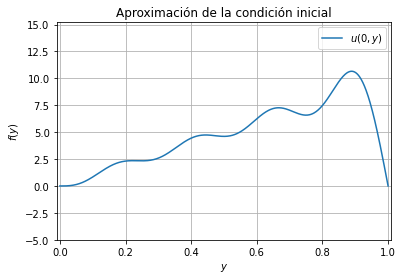

In [4248]:
plot(y,U[:,0],label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.-5,15.2]),grid(),legend()
show()

Luego, para la otra codicion, $\frac{\partial u}{\partial x}|_{x=1}=-1$.

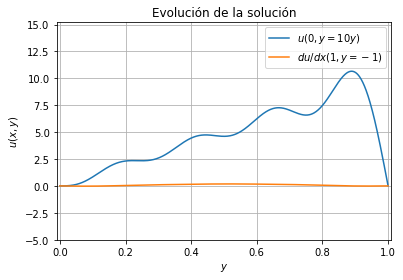

In [4249]:
plot(y,U[:,0],label='$u(0,y=10y)$') # Mejorar
plot(y,U[:,1],label='$du/dx(1,y=-1)$')
plt.xlabel('$y$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-5.01,15.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

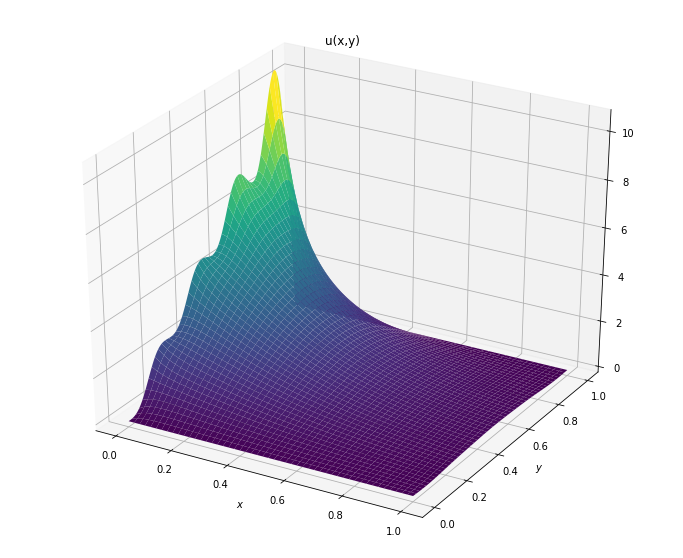

In [4250]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

y = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

Y,T = np.meshgrid(y,t)

U = u_y_t1(y,t)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("u(x,y)")
ax.plot_surface(Y, T, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"